In [1]:
import numpy as np
import pandas as pd

In [2]:
data = './data.csv'
df = pd.read_csv(data)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

We gotta clean all the columns, but also the values
This makes a python list out of the column names (indices)

In [6]:
strings  = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    # we iterate over all the values and lowercase
    # and replace spaces with underscores 
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

Exploratory Data Analysis

In [9]:
for col in df.columns:
    print(col)
    # We are taking a look at the first 5 unique values
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# need this line to make sure matplots can be displayed in notebook
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

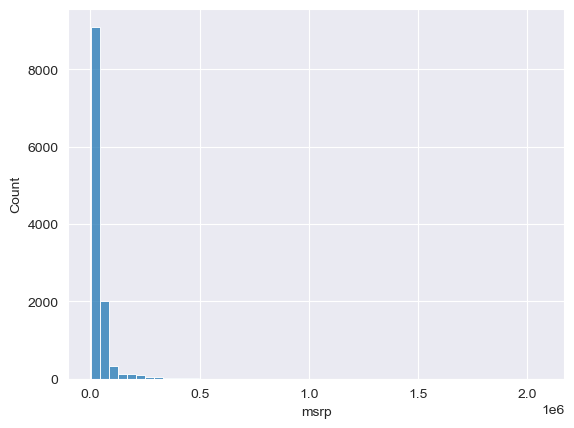

In [11]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

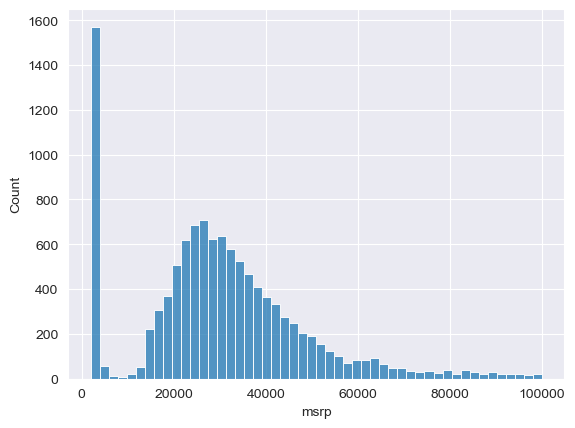

In [12]:
# bins is how many bars we have horizontally to represent the data
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
# long tail distribution (a few data points with different values towards the end)

This seems like a pretty straight forward distribution, not quite good for ML model, the tail will confuse the model,
we want to get rid of the long tail

In [13]:
np.log([1, 10, 1000, 100000])

# This won't work because the logarithm of 0 doesnt exist, to mitigate this, we add 1 to all vals
#np.log([0, 1, 10, 1000, 100000])
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [14]:
# we dont want to add this every time so we use

np.log1p([0, 1, 10, 1000, 100000]) 

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [15]:
price_logs= np.log1p(df.msrp)

In [16]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

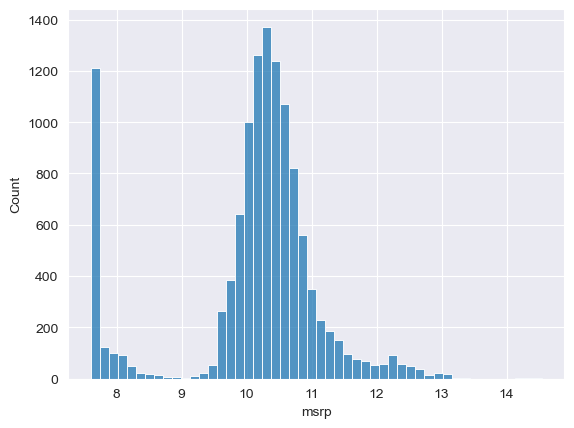

In [17]:
sns.histplot(price_logs, bins=50)

# normal distribution
# bell curve shape

In [18]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [20]:
# length of dataset
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val+n_test+n_train

(11914, 11914)

In [21]:
dv_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

We have a problem with the way this dataset is sliced, because we are ending up with a sequential dataset, where for example, all bmws will end up in the validation dataset. This is not good

It is a good idea to _always_ shuffle the data

In [22]:
# we could take arbitrary numbers here
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [23]:
df_train = df.iloc[n_train:]
dv_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:n_val:]

In [24]:
idx = np.arange(n)

In [25]:
np.random.seed(2)

np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [26]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [27]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [28]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [31]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression

`g(x) = y`

where `g` is the model, `x` is the feat matrix, and `y` is our target. In this model `y` is price

`g(xi) = yi`

`xi` being one car, and `yi` being one price

`xi = (xi1, xi2, xi3, ..., xin) = yi`

In [32]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [33]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [34]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

This is the same as doing:

`7.17 + 453 * 0.01 + 11 * 0.04 + 86 * 0.002`

In [35]:
linear_regression(xi)

12.312

In [36]:
7.17 + 453 * 0.01 + 11 * 0.04 + 86 * 0.002

12.312

In [37]:
from IPython.display import Image
Image(url="./weights_and_biases.png", height=500)

In [38]:
np.exp(linear_regression(xi))

222348.2221101062

In [39]:
# also a shortcut for m1
np.expm1(linear_regression(xi))

222347.2221101062

# Linear Regression

In [40]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [41]:
def linear_regression(xi):
    return w0 + dot(xi, w)    

In [42]:
# this will prepend `[w0]` to the beginning of the list at the `0` index
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [43]:
w_new

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)    

In [44]:
linear_regression(xi)

12.312

# Training a linear regression model
 
How do we come up with weights?


------------------

X.T * X(w) = X.T(y)

gram matrix

In [45]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [46]:
X = np.array(
    [
        [148, 24, 1385],
        [132, 25, 2031],
        [453, 11, 86],
        [158, 34, 185],
        [112, 15, 231],
        [333, 11, 86],
        [128, 84, 185],
        [922, 35, 31],
        [113, 12, 6],
    ]
)

In [47]:
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   34,  185],
       [ 112,   15,  231],
       [ 333,   11,   86],
       [ 128,   84,  185],
       [ 922,   35,   31],
       [ 113,   12,    6]])

In [48]:
# bias term helps us with baseline as well
# if we dont know anythign about the car one could say the minimum might be 500

ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [49]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 3.400e+01, 1.850e+02],
       [1.000e+00, 1.120e+02, 1.500e+01, 2.310e+02],
       [1.000e+00, 3.330e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.280e+02, 8.400e+01, 1.850e+02],
       [1.000e+00, 9.220e+02, 3.500e+01, 3.100e+01],
       [1.000e+00, 1.130e+02, 1.200e+01, 6.000e+00]])

In [50]:
 # gram matrix
XTX = X.T.dot(X)

y = [12200, 23300, 154440, 20110, 32110, 12212, 20450, 32201, 22102]

In [51]:
train_linear_regression(X, y)

(-1.3413983702687629e+21,
 array([ 1.34139837e+21,  5.40001560e+02, -2.34700870e+03,  4.86367534e+01]))

In [52]:
XTX_inv = np.linalg.inv(XTX)

In [53]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -1.64642029e-19, -6.09863722e-20,
        -4.19069551e-19],
       [-3.15940579e-13,  1.00000000e+00,  4.26333366e-15,
        -1.81709108e-16],
       [ 3.17327002e-15,  8.83767707e-18,  1.00000000e+00,
        -1.45415440e-17],
       [ 6.23658568e-14,  4.61318389e-16, -3.40663099e-16,
         1.00000000e+00]])

In [54]:
w_full = XTX_inv.dot(X.T).dot(y)

In [55]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(44622.60289265961, array([  38.74439706, -504.45513394,  -10.09996111]))

In [56]:
df_train.dtypes 

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [57]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values


In [58]:
w0, w = train_linear_regression(X_train, y_train)

In [59]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

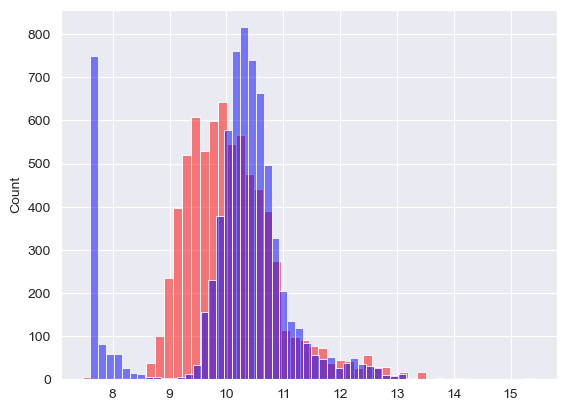

In [60]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

# RMSE Root Mean Squared Error

g(xi) <-> prediction for xi
yi <-> actual value

In [61]:
Image(url="./RMSE.png", height=500)

In [65]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [66]:
rmse(y_train, y_pred)

0.7554192603920132

In [69]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [73]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301608

In [80]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [92]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [93]:
X_train = prepare_X(df_train)

In [94]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [96]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [97]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058325

<Axes: ylabel='Count'>

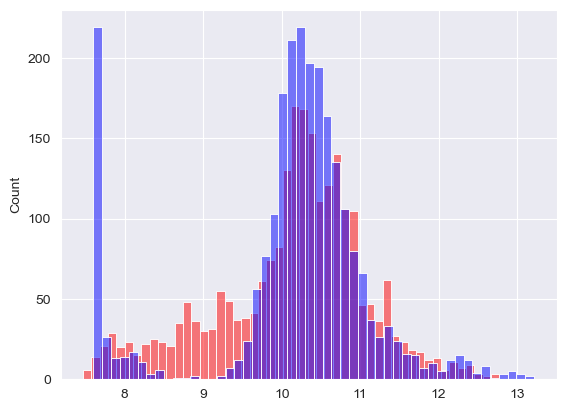

In [99]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

# Categorical Variables

non-numbers (typically strings)
 

In [109]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype(int)

In [111]:
for v in [2, 3, 4]:
    del df_train['num_doors_%s' % v]

In [112]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [113]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feat_name = 'num_doors_%s' % v
        df[feat_name] = (df.number_of_doors == v).astype(int)
        features. append(feat_name)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [114]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [115]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502287

In [131]:
makes = list(df.make.value_counts().head(20).index)

In [132]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feat_name = 'num_doors_%s' % v
        df[feat_name] = (df.number_of_doors == v).astype(int)
        features. append(feat_name)
        
    for v in makes:
        feat_name = 'make_%s' % v
        df[feat_name] = (df.make == v).astype(int)
        features. append(feat_name)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [133]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4858246038662308

In [134]:
 df_train.dtypes.index

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [137]:
cat_vars = [
    'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [138]:
categories = {}

for c in cat_vars:
    categories[c] = list(df[c].value_counts().head().index)

In [139]:
categories

{'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [140]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feat_name = 'num_doors_%s' % v
        df[feat_name] = (df.number_of_doors == v).astype(int)
        features. append(feat_name)
        
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
        
        
    for v in makes:
        feat_name = 'make_%s' % v
        df[feat_name] = (df.make == v).astype(int)
        features. append(feat_name)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [141]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

40.291864218777015

In [147]:
w

array([ 4.94885925e-02,  1.19453884e+01,  1.97065200e+00,  2.66762905e+00,
        1.82019761e-03,  1.27845107e+00,  1.07570430e+03,  1.09061965e+03,
        1.07264062e+03, -7.15144190e+01, -7.18645419e+01, -7.26207000e+01,
       -9.33328863e+01,  2.78174286e+01,  2.34574849e+15,  2.34574849e+15,
        2.34574849e+15,  2.34574849e+15,  2.34574849e+15,  4.37850365e+15,
        4.37850365e+15,  4.37850365e+15,  4.37850365e+15, -3.03602444e+00,
        4.46629051e+00,  1.47300068e+00,  1.45224333e+00,  7.15656632e+00,
        1.19836382e+01,  1.29087377e+01,  1.03133501e+01, -6.38054636e-02,
        2.91338213e-02,  1.61643358e-01,  3.18639984e-01, -1.67183998e-01,
       -3.06834729e-01, -1.01635935e+00, -1.33989617e-01, -5.19582616e-01,
       -4.69108614e-01, -6.41533765e-01, -1.04901431e-01, -4.24423426e-01,
       -8.50927760e-02, -1.19380392e-01, -4.19716632e-01,  1.48395631e-01,
       -8.15643242e-01, -6.59735122e-02, -7.02378294e-01, -3.02897677e-01,
       -2.61902143e-01, -

# Regularization

In [150]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1],
]

XTX = np.array(XTX)

np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [155]:
XTX = XTX + 0.01 * np.eye(3)

In [156]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [167]:
def train_linear_regression_reg(X, y, reg=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + reg * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [166]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.44213698662386686

# Tuning the model

In [173]:
for r in [0.0, 0.000001, 0.0001, 0.001, 0.1, 1, 10, 33333, -1]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, reg=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(r, '\t\t', w0, '\t\t', score)
    
    


0.0 		 -6724252134523324.0 		 40.291864218777015
1e-06 		 352.30696342649856 		 0.4421367598819023
0.0001 		 6.080685522221252 		 0.44213698662386686
0.001 		 6.065811210589365 		 0.44213749726069396
0.1 		 5.982797840219658 		 0.4421972904204894
1 		 5.491001953466611 		 0.4429735620534478
10 		 4.243780668686438 		 0.45724641357094525
33333 		 0.04809942440530129 		 1.400612275170777
-1 		 8.626842361308066 		 0.4436431772327585


In [174]:
r = 0.0001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, reg=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.44213698662386686

# Using the model

In [177]:
df_full_train = pd.concat([df_train, df_val])

In [178]:
df_full_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [179]:
df_full_train = df_full_train.reset_index(drop=True)

In [180]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [181]:
X_full_train = prepare_X(df_full_train)

In [182]:
X_full_train

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   0.],
       [148.,   4.,  37., ...,   1.,   0.,   0.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   1.]])

In [184]:
y_full_train = np.concatenate([y_train, y_val])

In [185]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, reg=0.001)

In [186]:
w

array([ 1.43906483e-03,  1.14990108e-01, -6.58479755e-03, -3.32474538e-03,
        1.82400254e-04, -9.72858665e-02, -4.96400498e-01, -5.87253630e-01,
       -3.34635074e-01, -4.34269970e-01,  1.40437867e-01, -2.73184982e-01,
       -5.59366685e-01,  1.20121955e-02,  1.11116564e+00,  9.13621827e-01,
        1.08941671e+00,  2.47322178e+00,  5.01512232e-01,  1.54920971e+00,
        1.48126159e+00,  1.55895326e+00,  1.50061019e+00, -7.71131063e-02,
        5.78491228e-02, -2.81408889e-02, -5.82469051e-02, -1.24781518e-02,
        2.10284242e+00,  2.01025118e+00,  1.97684903e+00, -6.15417144e-02,
        3.14753308e-02,  1.66686652e-01,  3.07427837e-01, -1.58479474e-01,
       -3.17218743e-01, -1.09112201e+00, -1.50689455e-01, -5.40022928e-01,
       -4.73664317e-01, -6.53577032e-01, -9.27234255e-02, -4.44653116e-01,
       -7.90931432e-02, -1.26302232e-01, -4.16606359e-01,  1.40337189e-01,
       -8.88324234e-01, -6.27299627e-02, -7.22344877e-01, -3.28677304e-01,
       -2.54657540e-01, -

In [188]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.43577311334192714

In [193]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [195]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [196]:
X_small = prepare_X(df_small)

In [197]:
y_pred = w0 + X_small.dot(w)

In [199]:
y_pred[0]

10.442566661647753

In [201]:
np.expm1(y_pred[0])

34287.54668998071

In [203]:
np.expm1(y_test[20])

35000.00000000001